<a href="https://colab.research.google.com/github/kamran-py/regressions/blob/master/Ex15_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!pip install xlrd pandas numpy statsmodels linearmodels
# Ensure openpyxl is installed and compatible with pandas
!pip install openpyxl==3.1.0

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


import statsmodels.api as sm

# We require the panel regression functionality
from linearmodels.iv import IV2SLS
from linearmodels import PanelOLS

In [4]:
Ch15data = pd.read_excel(r'/content/us_macro.xlsx', sheet_name='Data')

In [7]:
Ch15data = pd.read_excel('/content/us_macro.xlsx', sheet_name = 'Data')
print(Ch15data)

          freq      GDPC1    JAPAN_IP  PCECTPI    CPIAUCSL
0   1955-01-01   2683.766         NaN   15.755   26.793333
1   1955-04-01   2727.452         NaN   15.771   26.756667
2   1955-07-01   2764.128         NaN   15.834   26.776667
3   1955-10-01   2780.762         NaN   15.878   26.856667
4   1956-01-01   2770.032         NaN   15.943   26.860000
..         ...        ...         ...      ...         ...
247 2016-10-01  16851.420   99.125073  111.583  242.177333
248 2017-01-01  16903.240   99.291726  112.198  243.949000
249 2017-04-01  17031.085  101.324890  112.273  244.010000
250 2017-07-01  17163.894  101.724856  112.699  245.296667
251 2017-10-01  17271.702  103.491376  113.458  247.301333

[252 rows x 5 columns]


In [8]:
# a) i)
# Create the lag of PCECTPI

Ch15data['l1_PCECTPI'] = Ch15data['PCECTPI'].shift(1)

# Create the inflation measure, in annualized format. Notice the use of the
# log command(s) from the numpy package

Ch15data['Infl'] = 400 * (np.log(Ch15data['PCECTPI']) - np.log(Ch15data['l1_PCECTPI']))
print(Ch15data)

# And for a second format of the print ...

Ch15data

          freq      GDPC1    JAPAN_IP  PCECTPI    CPIAUCSL  l1_PCECTPI  \
0   1955-01-01   2683.766         NaN   15.755   26.793333         NaN   
1   1955-04-01   2727.452         NaN   15.771   26.756667      15.755   
2   1955-07-01   2764.128         NaN   15.834   26.776667      15.771   
3   1955-10-01   2780.762         NaN   15.878   26.856667      15.834   
4   1956-01-01   2770.032         NaN   15.943   26.860000      15.878   
..         ...        ...         ...      ...         ...         ...   
247 2016-10-01  16851.420   99.125073  111.583  242.177333     111.034   
248 2017-01-01  16903.240   99.291726  112.198  243.949000     111.583   
249 2017-04-01  17031.085  101.324890  112.273  244.010000     112.198   
250 2017-07-01  17163.894  101.724856  112.699  245.296667     112.273   
251 2017-10-01  17271.702  103.491376  113.458  247.301333     112.699   

         Infl  
0         NaN  
1    0.406014  
2    1.594686  
3    1.109991  
4    1.634143  
..        ...  

,freq,GDPC1,JAPAN_IP,PCECTPI,CPIAUCSL,l1_PCECTPI,Infl
0,1955-01-01,2683.766,NaN,15.755,26.793333,NaN,NaN
1,1955-04-01,2727.452,NaN,15.771,26.756667,15.755,0.406014
2,1955-07-01,2764.128,NaN,15.834,26.776667,15.771,1.594686
3,1955-10-01,2780.762,NaN,15.878,26.856667,15.834,1.109991
4,1956-01-01,2770.032,NaN,15.943,26.860000,15.878,1.634143
...,...,...,...,...,...,...,...
247,2016-10-01,16851.420,99.125073,111.583,242.177333,111.034,1.972899
248,2017-01-01,16903.240,99.291726,112.198,243.949000,111.583,2.198584
249,2017-04-01,17031.085,101.324890,112.273,244.010000,112.198,0.267295
250,2017-07-01,17163.894,101.724856,112.699,245.296667,112.273,1.514857


In [9]:
# Check on the endpoints for general fyi purposes. Notice that 1963:Q1 has index number 32, so it is in row 33.

Ch15data[(Ch15data.freq == '1963-01-01')]

,freq,GDPC1,JAPAN_IP,PCECTPI,CPIAUCSL,l1_PCECTPI,Infl
32,1963-01-01,3456.08,17.238516,18.069,30.476667,18.018,1.130602


In [10]:
# 2017:Q4 has index number 251, so it is row 252

Ch15data[(Ch15data.freq == '2017-10-01')]

,freq,GDPC1,JAPAN_IP,PCECTPI,CPIAUCSL,l1_PCECTPI,Infl
251,2017-10-01,17271.702,103.491376,113.458,247.301333,112.699,2.684871


In [19]:
# ii)
# Set up the plot of the inflation series

def plot_df(Ch15data, x, y, title = "U.S. Inflation", xlabel = 'Date', ylabel = 'Inflation', dpi = 100):
  plt.figure(figsize = (16,5), dpi = dpi)
  plt.plot(x, y, color = 'green')
  plt.gca().set(title = title, xlabel = xlabel, ylabel = ylabel)
  plt.show()



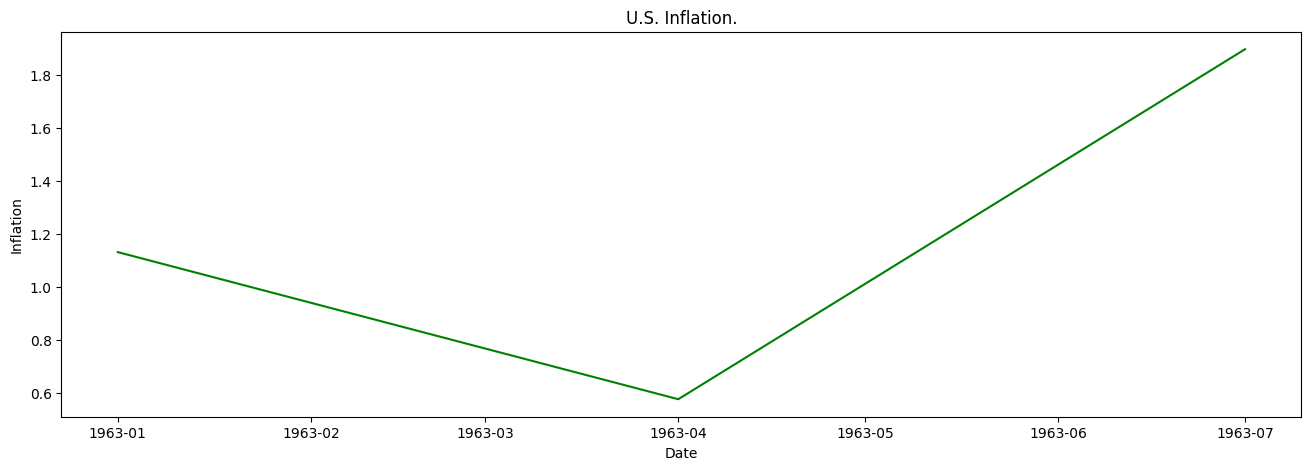

In [22]:
plot_df(Ch15data, x = Ch15data.freq[32:35], y = Ch15data.Infl[32:35], title = 'U.S. Inflation.')

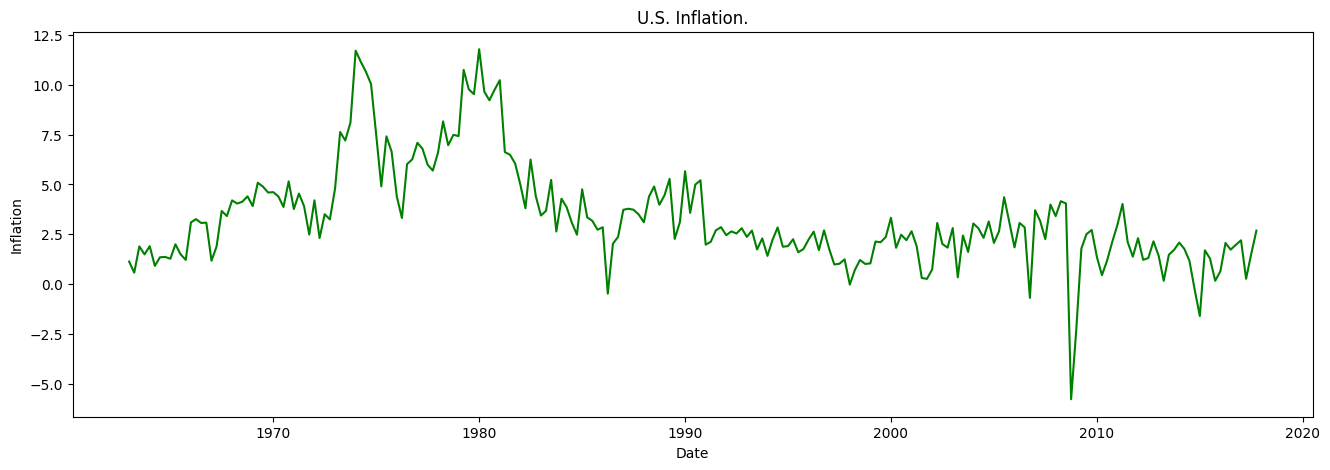

In [24]:
plot_df(Ch15data, x = Ch15data.freq[32:252], y = Ch15data.Infl[32:252], title = 'U.S. Inflation.')

In [25]:
# Inflation increased over the 20-year period 1960-1980, then declined for a decade and has
# been reasonably stable since then. It appears to have a stochastic trend.

In [26]:
# b) i)
# Because inflation has a stochastic trend, we know we will be working with the
# first difference of inflation. We create that variable below.

Ch15data['dinfl'] = Ch15data['Infl'] - Ch15data['Infl'].shift(1)
print(Ch15data)

          freq      GDPC1    JAPAN_IP  PCECTPI    CPIAUCSL  l1_PCECTPI  \
0   1955-01-01   2683.766         NaN   15.755   26.793333         NaN   
1   1955-04-01   2727.452         NaN   15.771   26.756667      15.755   
2   1955-07-01   2764.128         NaN   15.834   26.776667      15.771   
3   1955-10-01   2780.762         NaN   15.878   26.856667      15.834   
4   1956-01-01   2770.032         NaN   15.943   26.860000      15.878   
..         ...        ...         ...      ...         ...         ...   
247 2016-10-01  16851.420   99.125073  111.583  242.177333     111.034   
248 2017-01-01  16903.240   99.291726  112.198  243.949000     111.583   
249 2017-04-01  17031.085  101.324890  112.273  244.010000     112.198   
250 2017-07-01  17163.894  101.724856  112.699  245.296667     112.273   
251 2017-10-01  17271.702  103.491376  113.458  247.301333     112.699   

         Infl     dinfl  
0         NaN       NaN  
1    0.406014       NaN  
2    1.594686  1.188672  
3    1.

In [27]:
# We are asked to compute the first four auto correlations of the d1infl
# variable, done below. Notice that the first auto correlation is negative.
# Notice that the requested range goes up to index vlaue 252.
# A warning message that is not so important to us will also appear.


sm.tsa.acf(Ch15data['dinfl'][32:252], nlags = 4)

array([ 1.        , -0.245982  , -0.20351325,  0.13618648, -0.08498161])

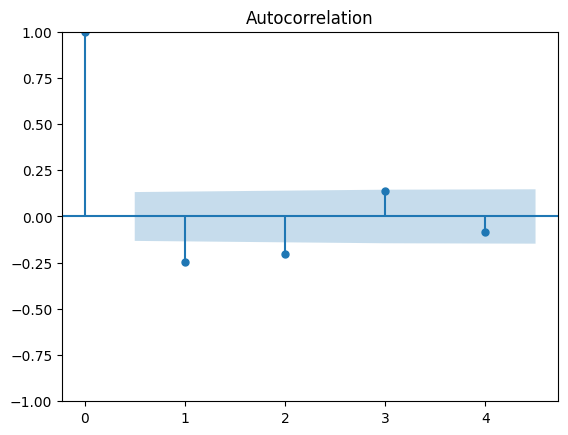

In [28]:
# On the graph below, the first vertical line on the plot is always one, and serves
# to scale the plot.
from statsmodels.graphics import tsaplots
fig = tsaplots.plot_acf(Ch15data['dinfl'][32:252], lags = 4)
plt.show()

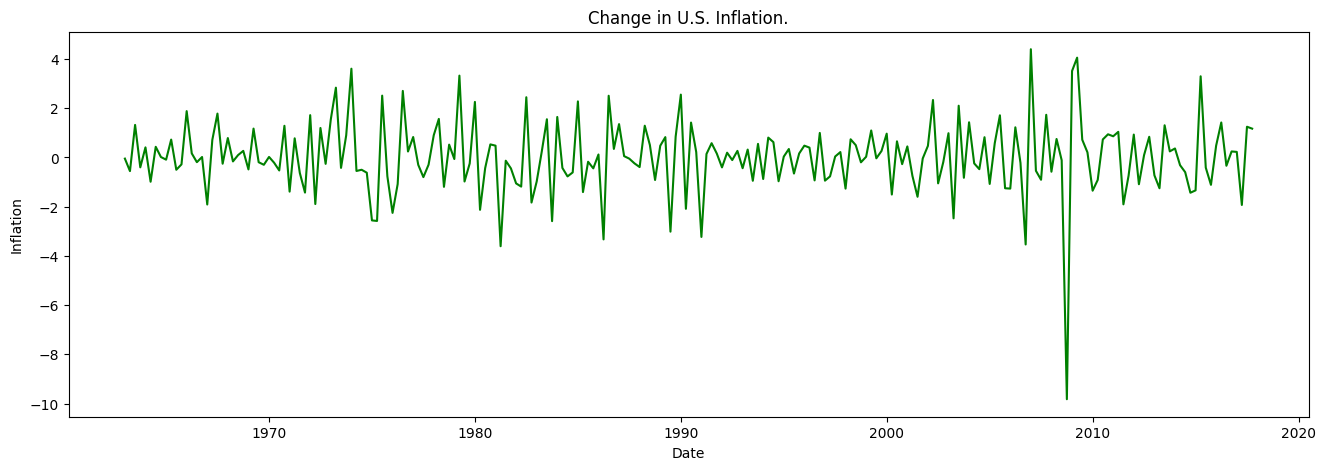

In [30]:
# The plot of the first differences, below, looks choppy because
# the first autocorrelation is negative. If an observation is
# above the mean, then the next one will tend to be below the mean,
# then back up again.

def plot_df(Ch15data, x, y, title = "Change in U.S. Inflation", xlabel = 'Date', ylabel = 'Inflation', dpi = 100):
  plt.figure(figsize = (16,5), dpi = dpi)
  plt.plot(x, y, color = 'green')
  plt.gca().set(title = title, xlabel = xlabel, ylabel = ylabel)
  plt.show()

plot_df(Ch15data, x = Ch15data.freq[32:252], y = Ch15data.dinfl[32:252], title = 'Change in U.S. Inflation.')

In [35]:
# c) i)

from statsmodels.formula.api import ols

# Create a variable to hold the lag of the first differences
Ch15data['d1infl'] = Ch15data['dinfl'].shift(1)

# Run the AR(1) model
lm1 = ols(formula = 'dinfl ~ d1infl', data = Ch15data[32:252])
results1 = lm1.fit(cov_type = "HC1", use_t = "True")

print(results1.summary())

results1.summary()

                            OLS Regression Results                            
Dep. Variable:                  dinfl   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     13.03
Date:                Sat, 29 Nov 2025   Prob (F-statistic):           0.000380
Time:                        20:07:40   Log-Likelihood:                -391.13
No. Observations:                 220   AIC:                             786.3
Df Residuals:                     218   BIC:                             793.0
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0074      0.097      0.076      0.9

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  dinfl   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     13.03
Date:                Sat, 29 Nov 2025   Prob (F-statistic):           0.000380
Time:                        20:07:40   Log-Likelihood:                -391.13
No. Observations:                 220   AIC:                             786.3
Df Residuals:                     218   BIC:                             793.0
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0074      0.097      0.076      0.939      -0.184       0.198
d1infl        -0.2467      0.068     -3.610      0.000      -0.381      -0.112
==============================================================================
Omnibus:                       92.219   Durbin-Watson:                   2.134
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              981.170
Skew:                          -1.293   Prob(JB):                    8.74e-214
Kurtosis:                      13.017   Cond. No.                         1.48
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [36]:
### The coefficient on lagged inflation is statistically significant,
# so the lagged inflation
# helps predict current inflation. Notice that the number of observations listed in the
# output is 220. That is the number of quarters in our desired range, and is a verification that
# we have requested the correct range size, 32 to 252.

# Notice also that the 'use_t = "True"'
# argument has been included in the fit command in order to override the python default of
# reverting to the z table. ###

In [37]:
# For completeness of output, let's request the SER.
np.sqrt(results1.scale)

np.float64(1.4383201610356344)

In [38]:
# The t statistic on the first difference is -3.61, so clearly the previous
# change in inflation is helpful in predicting the current change.

In [41]:
# ii)
# Create a variable to hold the second lag, in preparation to run the AR(2) model

Ch15data['d2infl'] = Ch15data['d1infl'].shift(1)


lm2 = ols(formula = 'dinfl ~ d1infl + d2infl',data = Ch15data[32:252])
results2 = lm2.fit(cov_type = "HC1", use_t = "True")
results2.summary()

print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  dinfl   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     13.98
Date:                Sat, 29 Nov 2025   Prob (F-statistic):           1.95e-06
Time:                        20:09:35   Log-Likelihood:                -381.92
No. Observations:                 220   AIC:                             769.8
Df Residuals:                     217   BIC:                             780.0
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0061      0.093      0.065      0.9

In [43]:
# The estimated coefficient on the second lag of the difference, is
# statistically significant, so the AR(2) model is preferred to the AR(1) model
# The adjusted R-squared is higher

In [47]:
# iii)

from math import log

# Calculate the BIC model, calculate_bic, that we will use later to caluclate the
# BIC values for the AR(p) regressions

def calculate_bic(T, ssr, num_params):
  bic = log(ssr/T) + num_params * log(T) / T
  return bic

# Create the additional lags that we will need in the process of
# calculating the BIC values

Ch15data['d3infl'] = Ch15data['d2infl'].shift(1)
Ch15data['d4infl'] = Ch15data['d3infl'].shift(1)
Ch15data['d5infl'] = Ch15data['d4infl'].shift(1)
Ch15data['d6infl'] = Ch15data['d5infl'].shift(1)
Ch15data['d7infl'] = Ch15data['d6infl'].shift(1)
Ch15data['d8infl'] = Ch15data['d7infl'].shift(1)

In [48]:
# Create all the component values for the BIC (and AIC) formula calculations

lm_1=smf.ols(formula='dinfl~d1infl',data=Ch15data[32:252])
results_1 = lm_1.fit()
ssr_1=results_1.ssr
num_params_1 = len(results_1.params)
num_params_1

N_1=len(results_1.fittedvalues)


lm_2=smf.ols(formula='dinfl~d1infl+d2infl',data=Ch15data[32:252])
results_2 = lm_2.fit()
ssr_2=results_2.ssr
num_params_2 = len(results_2.params)

N_2=len(results_2.fittedvalues)


lm_3=smf.ols(formula='dinfl~d1infl+d2infl+d3infl',data=Ch15data[32:252])
results_3 = lm_3.fit()
ssr_3=results_3.ssr
num_params_3= len(results_3.params)

N_3=len(results_3.fittedvalues)


lm_4=smf.ols(formula='dinfl~d1infl+d2infl+d3infl+d4infl',data=Ch15data[32:252])
results_4 = lm_4.fit()
ssr_4=results_4.ssr
num_params_4 = len(results_4.params)

N_4=len(results_4.fittedvalues)


lm_5=smf.ols(formula='dinfl~d1infl+d2infl+d3infl+d4infl+d5infl',data=Ch15data[32:252])
results_5 = lm_5.fit()
ssr_5=results_5.ssr
num_params_5 = len(results_5.params)

N_5=len(results_5.fittedvalues)


lm_6=smf.ols(formula='dinfl~d1infl+d2infl+d3infl+d4infl+d5infl+d6infl',data=Ch15data[32:252])
results_6 = lm_6.fit()
ssr_6=results_6.ssr
num_params_6 = len(results_6.params)

N_6=len(results_6.fittedvalues)


lm_7=smf.ols(formula='dinfl~d1infl+d2infl+d3infl+d4infl+d5infl+d6infl+d7infl',data=Ch15data[32:252])
results_7 = lm_7.fit()
ssr_7=results_7.ssr
num_params_7 = len(results_7.params)

N_7=len(results_7.fittedvalues)


lm_8=smf.ols(formula='dinfl~d1infl+d2infl+d3infl+d4infl+d5infl+d6infl+d7infl+d8infl',data=Ch15data[32:252])
results_8 = lm_8.fit()
ssr_8=results_8.ssr
num_params_8 = len(results_8.params)

N_8=len(results_8.fittedvalues)

In [52]:
# Calculate the BIC values

bic1 = calculate_bic(N_1, ssr_1, num_params_1)
bic2 = calculate_bic(N_2, ssr_2, num_params_2)
bic3 = calculate_bic(N_3, ssr_3, num_params_3)
bic4 = calculate_bic(N_4, ssr_4, num_params_4)
bic5 = calculate_bic(N_5, ssr_5, num_params_5)
bic6 = calculate_bic(N_6, ssr_6, num_params_6)
bic7 = calculate_bic(N_7, ssr_7, num_params_7)
bic8 = calculate_bic(N_8, ssr_8, num_params_8)

# Print each with three decimal places

print('BIC: %.3f' % bic1, '%.3f' % bic2,'%.3f' % bic3,'%.3f' % bic4,
      '%.3f' % bic5,'%.3f' % bic6,'%.3f' % bic7,'%.3f' % bic8)

BIC: 0.767 0.708 0.732 0.744 0.753 0.769 0.793 0.816


In [55]:
# Calculate AIC for the AR(2) regression. First build the model.
def calculate_aic(T, ssr, num_params):
  aic = log(ssr/T) + num_params * 2/T
  return aic


# Calculate the AIC values.
aic1 = calculate_aic(N_1, ssr_1, num_params_1)
aic2 = calculate_aic(N_2, ssr_2, num_params_2)
aic3 = calculate_aic(N_3, ssr_3, num_params_3)
aic4 = calculate_aic(N_4, ssr_4, num_params_4)
aic5 = calculate_aic(N_5, ssr_5, num_params_5)
aic6 = calculate_aic(N_6, ssr_6, num_params_6)
aic7 = calculate_aic(N_7, ssr_7, num_params_7)
aic8 = calculate_aic(N_8, ssr_8, num_params_8)

print('AIC: %.3f' % aic1, '%.3f' % aic2,'%.3f' % aic3,'%.3f' % aic4,
        '%.3f' % aic5,'%.3f'% aic6,'%.3f' % aic7,'%.3f' % aic8)

AIC: 0.736 0.661 0.670 0.667 0.661 0.661 0.670 0.677


In [56]:
# First an acknowledgement that these BIC and AIC values are slightly different than the ones
# calculated using R, but they are very close. Second, notice that the AIC has a local minimum
# at p = 2, and a global minimum at p = 5. Our authors only recognize the p = 2 minimum.
# Although that could be an oversight, in practice the practitioner would select 2 lags,
# knowing that the AIC can point to a lag quantity that is too large.
# Prof. Dvalshivilli is suggesting an extra, alternative method of finding the BIC and
# AIC minimums. Rather than trying to explain it, or take it out, it is retained in
# case any student has an interest in pursuing it on their own.

bic1=results_1.bic
bic2=results_2.bic
bic3=results_3.bic
bic4=results_4.bic
bic5=results_5.bic
bic6=results_6.bic
bic7=results_7.bic
bic8=results_8.bic

print('BIC: %.3f' % bic1, '%.3f' % bic2,'%.3f' % bic3,'%.3f' % bic4,
      '%.3f' % bic5,'%.3f' % bic6,'%.3f' % bic7,'%.3f' % bic8)

BIC: 793.040 780.027 785.415 787.941 790.060 793.487 798.818 803.913


In [57]:
aic1=results_1.aic
aic2=results_2.aic
aic3=results_3.aic
aic4=results_4.aic
aic5=results_5.aic
aic6=results_6.aic
aic7=results_7.aic
aic8=results_8.aic

print('AIC: %.3f' % aic1, '%.3f' % aic2,'%.3f' % aic3,'%.3f' % aic4,
      '%.3f' % aic5,'%.3f' % aic6,'%.3f' % aic7,'%.3f' % aic8)

AIC: 786.253 769.846 771.840 770.973 769.698 769.731 771.669 773.370


In [58]:
# iv)
# We are asked to predict 2018:Q1 using the AR(2) model. First remind ourselves
# about the index numbers and values for the observations that we will need

Ch15data[(Ch15data.freq == '2017-10-01')]

,freq,GDPC1,JAPAN_IP,PCECTPI,CPIAUCSL,l1_PCECTPI,Infl,dinfl,d1infl,d2infl,d3infl,d4infl,d5infl,d6infl,d7infl,d8infl
251,2017-10-01,17271.702,103.491376,113.458,247.301333,112.699,2.684871,1.170014,1.247562,-1.931288,0.225684,0.243569,-0.338326,1.419771,0.480284,-1.113591


In [59]:
Ch15data[(Ch15data.freq == '2017-07-01')]

,freq,GDPC1,JAPAN_IP,PCECTPI,CPIAUCSL,l1_PCECTPI,Infl,dinfl,d1infl,d2infl,d3infl,d4infl,d5infl,d6infl,d7infl,d8infl
250,2017-07-01,17163.894,101.724856,112.699,245.296667,112.273,1.514857,1.247562,-1.931288,0.225684,0.243569,-0.338326,1.419771,0.480284,-1.113591,-0.415115


In [60]:
# The most straightforward approach is to do it manually

d1infl_forecast = 0.006075439 * 1 + (-0.317739598) * 1.170014 + (-0.284425193) * 1.247562
d1infl_forecast

-0.7205224016438381

In [62]:
# Below is an alternative way to do it. The backslash is a line continuation marker. Often
# it is not needed, but here it is needed if an indentation is desired.

DeltInfl20181 = results2.params[0] + results2.params[1] * Ch15data.dinfl[251] \
+ results2.params[2] * Ch15data.dinfl[250]

DeltInfl20181

/tmp/ipython-input-48771804.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  DeltInfl20181 = results2.params[0] + results2.params[1] * Ch15data.dinfl[251] \
/tmp/ipython-input-48771804.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  + results2.params[2] * Ch15data.dinfl[250]


np.float64(-0.7205222412628435)

In [63]:
# The predicted change in inflation is -0.72 : np.float64(-0.7205222412628435)

In [64]:
# v)
# To predict the level from the predicted first difference, we simply add
# the projected first difference to the level of the last observation


Infl20181 = DeltInfl20181 + Ch15data.Infl[251]
Infl20181

np.float64(1.9643483561361261)

In [65]:
# The predicted level of inflation is 1.96 : np.float64(1.9643483561361261)

In [66]:
# d) i)
# We are asked to run an (augmented, simply meaning more than one right hand
# side variable ) Dickey Fuller test to confirm that inflation
# has a stochastic trend. Refer to equation 15.32 to recall the layout. We are
# asked to do it for an AR(3) model of inflation, not of the first differences
# of inflation (which we have not run, but that is okay). First create the
# lagged inflation (levels) variable.


Ch15data['l1infl'] = Ch15data['Infl'].shift(1)
lm_ADF = ols(formula='dinfl ~ l1infl + d1infl + d2infl',data = Ch15data[32:252])

# Recall that the Dickey Fuller test is done on a homoskedasticity-only basis,
# so there is no need to request a robust fit. The test statistic is the
# coefficient on the first variable, the one in levels, not in first
# differences. Here the t statistic is -2.74. We compare that to the
# critical values on page 545, table 15.4. We see that we cannot reject the
# null hypothesis at the 5% level, so we continue under the working assumption
# inflation has a stochastic trend (and thus we first differenced earlier in
# the exercise)


results_ADF = lm_ADF.fit()
print(results_ADF.summary())

                            OLS Regression Results                            
Dep. Variable:                  dinfl   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     14.24
Date:                Sat, 29 Nov 2025   Prob (F-statistic):           1.68e-08
Time:                        20:20:22   Log-Likelihood:                -378.17
No. Observations:                 220   AIC:                             764.3
Df Residuals:                     216   BIC:                             777.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3592      0.158      2.270      0.0

In [67]:
# Suggests an alternative approach to puruse the ADF test below

from statsmodels.tsa.stattools import adfuller

# This can be done by setting the autolag = 'AIC'. By doing so, the adfuller command will
# choose the number of lags that yields the lowest AIC. This is usually a good option to follow.

result = adfuller(Ch15data['Infl'][32:252], autolag = 'AIC')
print(result)

(np.float64(-2.7157598946599317), np.float64(0.0713505972703993), 2, 217, {'1%': np.float64(-3.460849270544952), '5%': np.float64(-2.87495318813585), '10%': np.float64(-2.5739190539191745)}, np.float64(721.4499630870966))


In [111]:
# i) ANSWER: (np.float64(-2.7157598946599317), np.float64(0.0713505972703993),
#          2, 217, {'1%': np.float64(-3.460849270544952), '5%'
#          : np.float64(-2.87495318813585), '10%'
#          : np.float64(-2.5739190539191745)}, np.float64(721.4499630870966))




# ii) ANSWER:
# The inflation rate does not exhibit a linear trend, so the specification that
# includes an intercept, but no time trend, is appropriate.

In [70]:
# iii) ANSWER:

# Remember that the ADF test is about finding a unit root in the inflation
# series (not in the first difference of inflation series). The authors'
# solution points out that the BIC chose p = 2 for the differenced inflation
# series. Fine, but we want the length of p for the inflation series. Perhaps
# they had in mind that if the BIC chooses p = 2 for the differenced series
# that it may be expected to choose p = 3 for the inflation (levels) series.
# That reasoning would then have the ADF equation be created with the first
# variable in levels and the next two in differences.

In [71]:
# iv) ANSWER:

# We cannot reject the null hypothesis of a unit root at the 5% level. Thus we
# go forward with that as the working assumption.

In [72]:
# Create an index of quarters to be used in QLR process. Print them
# just to verify how they turned out.

year_qrt_full=np.linspace(1955,2017.75,252)
print(year_qrt_full)

[1955.   1955.25 1955.5  1955.75 1956.   1956.25 1956.5  1956.75 1957.
 1957.25 1957.5  1957.75 1958.   1958.25 1958.5  1958.75 1959.   1959.25
 1959.5  1959.75 1960.   1960.25 1960.5  1960.75 1961.   1961.25 1961.5
 1961.75 1962.   1962.25 1962.5  1962.75 1963.   1963.25 1963.5  1963.75
 1964.   1964.25 1964.5  1964.75 1965.   1965.25 1965.5  1965.75 1966.
 1966.25 1966.5  1966.75 1967.   1967.25 1967.5  1967.75 1968.   1968.25
 1968.5  1968.75 1969.   1969.25 1969.5  1969.75 1970.   1970.25 1970.5
 1970.75 1971.   1971.25 1971.5  1971.75 1972.   1972.25 1972.5  1972.75
 1973.   1973.25 1973.5  1973.75 1974.   1974.25 1974.5  1974.75 1975.
 1975.25 1975.5  1975.75 1976.   1976.25 1976.5  1976.75 1977.   1977.25
 1977.5  1977.75 1978.   1978.25 1978.5  1978.75 1979.   1979.25 1979.5
 1979.75 1980.   1980.25 1980.5  1980.75 1981.   1981.25 1981.5  1981.75
 1982.   1982.25 1982.5  1982.75 1983.   1983.25 1983.5  1983.75 1984.
 1984.25 1984.5  1984.75 1985.   1985.25 1985.5  1985.75 1986.

In [73]:
# Below we start the process of generating the trimmed data. We have been
# working with 220 quarters in our data range of interest, index numbers 32 through 251, which
# is 1960:Q1 through 2017:Q4. 220 * 0.15 = 33 quarters to remove from each end.
# So we want index numbers 65 through 218, or 1971:Q2 through 2009:Q3.

tau = np.linspace(1971.25, 2009.50,154)
print(tau)
print(tau[0])
print(tau[153])

[1971.25 1971.5  1971.75 1972.   1972.25 1972.5  1972.75 1973.   1973.25
 1973.5  1973.75 1974.   1974.25 1974.5  1974.75 1975.   1975.25 1975.5
 1975.75 1976.   1976.25 1976.5  1976.75 1977.   1977.25 1977.5  1977.75
 1978.   1978.25 1978.5  1978.75 1979.   1979.25 1979.5  1979.75 1980.
 1980.25 1980.5  1980.75 1981.   1981.25 1981.5  1981.75 1982.   1982.25
 1982.5  1982.75 1983.   1983.25 1983.5  1983.75 1984.   1984.25 1984.5
 1984.75 1985.   1985.25 1985.5  1985.75 1986.   1986.25 1986.5  1986.75
 1987.   1987.25 1987.5  1987.75 1988.   1988.25 1988.5  1988.75 1989.
 1989.25 1989.5  1989.75 1990.   1990.25 1990.5  1990.75 1991.   1991.25
 1991.5  1991.75 1992.   1992.25 1992.5  1992.75 1993.   1993.25 1993.5
 1993.75 1994.   1994.25 1994.5  1994.75 1995.   1995.25 1995.5  1995.75
 1996.   1996.25 1996.5  1996.75 1997.   1997.25 1997.5  1997.75 1998.
 1998.25 1998.5  1998.75 1999.   1999.25 1999.5  1999.75 2000.   2000.25
 2000.5  2000.75 2001.   2001.25 2001.5  2001.75 2002.   200

In [75]:
# The estimation loop over the possible break dates is below

for i in range(0, len(tau)):
  dummy1 = pd.DataFrame({"D" + str(i) : np.where(year_qrt_full < tau[i],0,1)})
  dummy1["D" + str(i)] = dummy1["D" + str(i)].astype('float64')
  Ch15data = pd.concat([Ch15data,dummy1["D" + str(i)]], axis = 1)
  Ch15data["D_d1infl" + str(i)] = dummy1["D" + str(i)] * Ch15data['d1infl']
  Ch15data["D_d2infl" + str(i)] = dummy1["D" + str(i)] * Ch15data['d2infl']
  Ch15data_new=Ch15data[32:252]

In [77]:
Ch15data_new
pd.set_option('display.max_columns', 207)


print(Ch15data_new)

          freq      GDPC1    JAPAN_IP  PCECTPI    CPIAUCSL  l1_PCECTPI  \
32  1963-01-01   3456.080   17.238516   18.069   30.476667      18.018   
33  1963-04-01   3501.134   18.222013   18.095   30.533333      18.069   
34  1963-07-01   3569.479   19.178191   18.181   30.720000      18.095   
35  1963-10-01   3594.954   20.161688   18.249   30.803333      18.181   
36  1964-01-01   3672.708   20.817353   18.336   30.930000      18.249   
..         ...        ...         ...      ...         ...         ...   
247 2016-10-01  16851.420   99.125073  111.583  242.177333     111.034   
248 2017-01-01  16903.240   99.291726  112.198  243.949000     111.583   
249 2017-04-01  17031.085  101.324890  112.273  244.010000     112.198   
250 2017-07-01  17163.894  101.724856  112.699  245.296667     112.273   
251 2017-10-01  17271.702  103.491376  113.458  247.301333     112.699   

         Infl     dinfl    d1infl    d2infl    d3infl    d4infl    d5infl  \
32   1.130602 -0.047733  0.130485 

In [86]:
ssr = np.zeros(len(tau))
for i in range(0, len(tau)):
  x1=Ch15data_new["d1infl"]
  x2=Ch15data_new["d2infl"]
  x3=Ch15data_new["D" + str(i)]
  x4=Ch15data_new["D_d1infl" + str(i)]
  x5=Ch15data_new["D_d2infl" + str(i)]
  y=Ch15data_new["dinfl"]
  DATA=pd.concat([x1,x2,x3,x4,x5,y], axis = 1)
  OLS=smf.ols(formula='y~x1+x2+x3+x4+x5',data=DATA)
  results_OLS = OLS.fit()
  ssr[i]=results_OLS.ssr

In [87]:
F_stat=np.zeros(len(tau))
for i in range(0, len(tau)):
  x1=Ch15data_new["d1infl"]
  x2=Ch15data_new["d2infl"]
  x3=Ch15data_new["D" + str(i)]
  x4=Ch15data_new["D_d1infl" + str(i)]
  x5=Ch15data_new["D_d2infl" + str(i)]
  y=Ch15data_new["dinfl"]
  DATA=pd.concat([x1,x2,x3,x4,x5,y], axis = 1)
  DATA=pd.DataFrame(DATA)
  OLS=smf.ols(formula='y~x1+x2+x3+x4+x5',data=DATA)
  results_OLS = OLS.fit(cov_type='HC1')
  results_OLS.summary()
  hypotheses ='(x3 = 0), (x4 = 0), (x5 = 0)'
  F=results_OLS.f_test(hypotheses)
  dir(F)
  F_stat[i]=F.fvalue
  print(F.pvalue)

0.5855589603286643
0.4039933618050895
0.34927918221337967
0.7382221021027952
0.5427880433617529
0.33343063790154553
0.1468482060872703
0.11988493555012564
0.06476437933052492
0.14418364982379117
0.10230466685563033
0.024633131089437994
0.016901818715393566
0.011526698893368789
0.026235512936999748
0.02804503827286849
0.02860753086118322
0.018573281928586097
0.08518986228069843
0.074356041414594
0.2926648732652862
0.21516800931247593
0.33388577406119224
0.27454765695610683
0.16751554077220862
0.17056754641038852
0.1945312609044182
0.19563814523402512
0.1934699837774244
0.14235284778878987
0.18422788172323162
0.17427056688370493
0.17766365207669388
0.10648311373209426
0.11505778507891588
0.11063146585097627
0.10133449247339786
0.17485738514357332
0.19611353787691288
0.19470797952600136
0.1833090045005237
0.35696552172868934
0.3079751772224679
0.240274527055402
0.24422108442625004
0.21627930055004588
0.27886532359358573
0.32822635076662365
0.37174748271307084
0.33971566034043876
0.3501080

In [88]:
QLR = max(F_stat)
QLR
# The 5% critical value is 4.71, so we reject null hyposesis of no structural break.

np.float64(5.116666398654438)

In [97]:
np.where(F_stat==QLR)
tau[152]

# So the sturcutral break is in 2009 Q2

np.float64(2009.25)

In [98]:
F_stat_Data = pd.DataFrame(F_stat)
F_stat_Data
len(F_stat_Data)


154

In [99]:
Ch15data_new.freq
pd.set_option('display.max_rows', 251)
# print(Ch15data_new.freq)
Ch15data_Updated=Ch15data_new[16:204]
#Ch15data_Updated

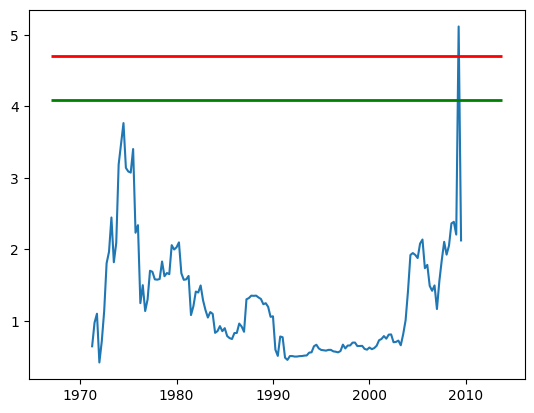

In [100]:
Ch15data_Updated_F_stat_mat=np.asmatrix(F_stat_Data)

Ch15data_Updated_F_stat_mat=np.transpose(Ch15data_Updated_F_stat_mat)

Ch15data_Updated_tau_mat=np.asmatrix(tau)


Ch15data_graph=np.concatenate((Ch15data_Updated_tau_mat, Ch15data_Updated_F_stat_mat))
Ch15data_graph
Ch15data_graph=np.transpose(Ch15data_graph)
Ch15data_graph
Ch15data_graph_data=pd.DataFrame(Ch15data_graph)


#print(Ch15data_graph_data)
Time=Ch15data_graph_data[0]
F_statistics=Ch15data_graph_data[1]
graph_data=pd.concat([Time,F_statistics], axis = 1)
graph_data=pd.DataFrame(graph_data)
graph_data=graph_data.rename({0: 'Time'}, axis=1)
graph_data=graph_data.rename({1: 'F_stat'}, axis=1)


# graph_data
fig, gr = plt.subplots()
gr.plot(graph_data.Time, graph_data.F_stat)
gr.hlines(y=4.71,linewidth=2, xmin=1967.00, xmax=2013.75, color='r')
gr.hlines(y=4.09,linewidth=2, xmin=1967.00, xmax=2013.75, color='green')


plt.show()

In [101]:
# f) ANSWER:

# We seek psuedo sample forecasts. We create the length of
# our out of sample period, 2003 through 2017.
(2017.75-2003)/0.25+1

60.0

In [102]:
# We find the index numbers of our dates of interest.
Ch15data[(Ch15data.freq == '1963-01-01')]

,freq,GDPC1,JAPAN_IP,PCECTPI,CPIAUCSL,l1_PCECTPI,Infl,dinfl,d1infl,d2infl,d3infl,d4infl,d5infl,d6infl,d7infl,d8infl,l1infl,D0,D_d1infl0,D_d2infl0,D1,D_d1infl1,D_d2infl1,D2,D_d1infl2,D_d2infl2,D3,D_d1infl3,D_d2infl3,D4,D_d1infl4,D_d2infl4,D5,D_d1infl5,D_d2infl5,D6,D_d1infl6,D_d2infl6,D7,D_d1infl7,D_d2infl7,D8,D_d1infl8,D_d2infl8,D9,D_d1infl9,D_d2infl9,D10,D_d1infl10,D_d2infl10,D11,D_d1infl11,D_d2infl11,D12,D_d1infl12,D_d2infl12,D13,D_d1infl13,D_d2infl13,D14,D_d1infl14,D_d2infl14,D15,D_d1infl15,D_d2infl15,D16,D_d1infl16,D_d2infl16,D17,D_d1infl17,D_d2infl17,D18,D_d1infl18,D_d2infl18,D19,D_d1infl19,D_d2infl19,D20,D_d1infl20,D_d2infl20,D21,D_d1infl21,D_d2infl21,D22,D_d1infl22,D_d2infl22,D23,D_d1infl23,D_d2infl23,D24,D_d1infl24,D_d2infl24,D25,D_d1infl25,D_d2infl25,D26,D_d1infl26,D_d2infl26,D27,D_d1infl27,D_d2infl27,D28,D_d1infl28,...,D_d2infl119,D120,D_d1infl120,D_d2infl120,D121,D_d1infl121,D_d2infl121,D122,D_d1infl122,D_d2infl122,D123,D_d1infl123,D_d2infl123,D124,D_d1infl124,D_d2infl124,D125,D_d1infl125,D_d2infl125,D126,D_d1infl126,D_d2infl126,D127,D_d1infl127,D_d2infl127,D128,D_d1infl128,D_d2infl128,D129,D_d1infl129,D_d2infl129,D130,D_d1infl130,D_d2infl130,D131,D_d1infl131,D_d2infl131,D132,D_d1infl132,D_d2infl132,D133,D_d1infl133,D_d2infl133,D134,D_d1infl134,D_d2infl134,D135,D_d1infl135,D_d2infl135,D136,D_d1infl136,D_d2infl136,D137,D_d1infl137,D_d2infl137,D138,D_d1infl138,D_d2infl138,D139,D_d1infl139,D_d2infl139,D140,D_d1infl140,D_d2infl140,D141,D_d1infl141,D_d2infl141,D142,D_d1infl142,D_d2infl142,D143,D_d1infl143,D_d2infl143,D144,D_d1infl144,D_d2infl144,D145,D_d1infl145,D_d2infl145,D146,D_d1infl146,D_d2infl146,D147,D_d1infl147,D_d2infl147,D148,D_d1infl148,D_d2infl148,D149,D_d1infl149,D_d2infl149,D150,D_d1infl150,D_d2infl150,D151,D_d1infl151,D_d2infl151,D152,D_d1infl152,D_d2infl152,D153,D_d1infl153,D_d2infl153
32,1963-01-01,3456.08,17.238516,18.069,30.476667,18.018,1.130602,-0.047733,0.130485,-0.338633,-0.387157,1.323367,-1.016625,1.512113,-0.791928,-1.023805,1.178335,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,...,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0


In [103]:
Ch15data[(Ch15data.freq == '2017-10-01')]

,freq,GDPC1,JAPAN_IP,PCECTPI,CPIAUCSL,l1_PCECTPI,Infl,dinfl,d1infl,d2infl,d3infl,d4infl,d5infl,d6infl,d7infl,d8infl,l1infl,D0,D_d1infl0,D_d2infl0,D1,D_d1infl1,D_d2infl1,D2,D_d1infl2,D_d2infl2,D3,D_d1infl3,D_d2infl3,D4,D_d1infl4,D_d2infl4,D5,D_d1infl5,D_d2infl5,D6,D_d1infl6,D_d2infl6,D7,D_d1infl7,D_d2infl7,D8,D_d1infl8,D_d2infl8,D9,D_d1infl9,D_d2infl9,D10,D_d1infl10,D_d2infl10,D11,D_d1infl11,D_d2infl11,D12,D_d1infl12,D_d2infl12,D13,D_d1infl13,D_d2infl13,D14,D_d1infl14,D_d2infl14,D15,D_d1infl15,D_d2infl15,D16,D_d1infl16,D_d2infl16,D17,D_d1infl17,D_d2infl17,D18,D_d1infl18,D_d2infl18,D19,D_d1infl19,D_d2infl19,D20,D_d1infl20,D_d2infl20,D21,D_d1infl21,D_d2infl21,D22,D_d1infl22,D_d2infl22,D23,D_d1infl23,D_d2infl23,D24,D_d1infl24,D_d2infl24,D25,D_d1infl25,D_d2infl25,D26,D_d1infl26,D_d2infl26,D27,D_d1infl27,D_d2infl27,D28,D_d1infl28,...,D_d2infl119,D120,D_d1infl120,D_d2infl120,D121,D_d1infl121,D_d2infl121,D122,D_d1infl122,D_d2infl122,D123,D_d1infl123,D_d2infl123,D124,D_d1infl124,D_d2infl124,D125,D_d1infl125,D_d2infl125,D126,D_d1infl126,D_d2infl126,D127,D_d1infl127,D_d2infl127,D128,D_d1infl128,D_d2infl128,D129,D_d1infl129,D_d2infl129,D130,D_d1infl130,D_d2infl130,D131,D_d1infl131,D_d2infl131,D132,D_d1infl132,D_d2infl132,D133,D_d1infl133,D_d2infl133,D134,D_d1infl134,D_d2infl134,D135,D_d1infl135,D_d2infl135,D136,D_d1infl136,D_d2infl136,D137,D_d1infl137,D_d2infl137,D138,D_d1infl138,D_d2infl138,D139,D_d1infl139,D_d2infl139,D140,D_d1infl140,D_d2infl140,D141,D_d1infl141,D_d2infl141,D142,D_d1infl142,D_d2infl142,D143,D_d1infl143,D_d2infl143,D144,D_d1infl144,D_d2infl144,D145,D_d1infl145,D_d2infl145,D146,D_d1infl146,D_d2infl146,D147,D_d1infl147,D_d2infl147,D148,D_d1infl148,D_d2infl148,D149,D_d1infl149,D_d2infl149,D150,D_d1infl150,D_d2infl150,D151,D_d1infl151,D_d2infl151,D152,D_d1infl152,D_d2infl152,D153,D_d1infl153,D_d2infl153
251,2017-10-01,17271.702,103.491376,113.458,247.301333,112.699,2.684871,1.170014,1.247562,-1.931288,0.225684,0.243569,-0.338326,1.419771,0.480284,-1.113591,1.514857,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,...,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288,1.0,1.247562,-1.931288


In [104]:
Ch15data[(Ch15data.freq == '2003-01-01')]

,freq,GDPC1,JAPAN_IP,PCECTPI,CPIAUCSL,l1_PCECTPI,Infl,dinfl,d1infl,d2infl,d3infl,d4infl,d5infl,d6infl,d7infl,d8infl,l1infl,D0,D_d1infl0,D_d2infl0,D1,D_d1infl1,D_d2infl1,D2,D_d1infl2,D_d2infl2,D3,D_d1infl3,D_d2infl3,D4,D_d1infl4,D_d2infl4,D5,D_d1infl5,D_d2infl5,D6,D_d1infl6,D_d2infl6,D7,D_d1infl7,D_d2infl7,D8,D_d1infl8,D_d2infl8,D9,D_d1infl9,D_d2infl9,D10,D_d1infl10,D_d2infl10,D11,D_d1infl11,D_d2infl11,D12,D_d1infl12,D_d2infl12,D13,D_d1infl13,D_d2infl13,D14,D_d1infl14,D_d2infl14,D15,D_d1infl15,D_d2infl15,D16,D_d1infl16,D_d2infl16,D17,D_d1infl17,D_d2infl17,D18,D_d1infl18,D_d2infl18,D19,D_d1infl19,D_d2infl19,D20,D_d1infl20,D_d2infl20,D21,D_d1infl21,D_d2infl21,D22,D_d1infl22,D_d2infl22,D23,D_d1infl23,D_d2infl23,D24,D_d1infl24,D_d2infl24,D25,D_d1infl25,D_d2infl25,D26,D_d1infl26,D_d2infl26,D27,D_d1infl27,D_d2infl27,D28,D_d1infl28,...,D_d2infl119,D120,D_d1infl120,D_d2infl120,D121,D_d1infl121,D_d2infl121,D122,D_d1infl122,D_d2infl122,D123,D_d1infl123,D_d2infl123,D124,D_d1infl124,D_d2infl124,D125,D_d1infl125,D_d2infl125,D126,D_d1infl126,D_d2infl126,D127,D_d1infl127,D_d2infl127,D128,D_d1infl128,D_d2infl128,D129,D_d1infl129,D_d2infl129,D130,D_d1infl130,D_d2infl130,D131,D_d1infl131,D_d2infl131,D132,D_d1infl132,D_d2infl132,D133,D_d1infl133,D_d2infl133,D134,D_d1infl134,D_d2infl134,D135,D_d1infl135,D_d2infl135,D136,D_d1infl136,D_d2infl136,D137,D_d1infl137,D_d2infl137,D138,D_d1infl138,D_d2infl138,D139,D_d1infl139,D_d2infl139,D140,D_d1infl140,D_d2infl140,D141,D_d1infl141,D_d2infl141,D142,D_d1infl142,D_d2infl142,D143,D_d1infl143,D_d2infl143,D144,D_d1infl144,D_d2infl144,D145,D_d1infl145,D_d2infl145,D146,D_d1infl146,D_d2infl146,D147,D_d1infl147,D_d2infl147,D148,D_d1infl148,D_d2infl148,D149,D_d1infl149,D_d2infl149,D150,D_d1infl150,D_d2infl150,D151,D_d1infl151,D_d2infl151,D152,D_d1infl152,D_d2infl152,D153,D_d1infl153,D_d2infl153
192,2003-01-01,13031.169,98.965727,87.161,183.366667,86.55,2.813881,0.984168,-0.185686,-1.052729,2.333915,0.47032,-0.04263,-1.599178,-0.748041,0.447954,1.829713,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,...,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0


In [107]:
# Initialize the array of forecasts.
forecasts=np.zeros(60)
forecasts


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [109]:
Time=np.linspace(1955,2017.75,252)
Time=pd.DataFrame(Time)

Time=Time.rename({0: 'Time'}, axis=1)

Ch15data_forecast=pd.concat([Time,Ch15data], axis = 1)


EndOfSample = np.linspace(2003, 2017.75, 60)


# Estimate the AR(2) model.

for i in range(0, len(forecasts)):

  OLS=smf.ols(formula='dinfl~d1infl+d2infl',data=Ch15data[32:192+i])
  resultsOLS = OLS.fit(cov_type = "HC1")
  resultsOLS.summary()
  A1=Ch15data_forecast["d1infl"][Ch15data_forecast["Time"]==EndOfSample[i]-0.5]
  A2=Ch15data_forecast["d1infl"][Ch15data_forecast["Time"]==EndOfSample[i]-0.75]
  A1=np.asmatrix(A1)
  A2=np.asmatrix(A2)
  forecasts[i]=resultsOLS.params[0]+resultsOLS.params[1]*A1+resultsOLS.params[2]*A2

/tmp/ipython-input-2279500164.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecasts[i]=resultsOLS.params[0]+resultsOLS.params[1]*A1+resultsOLS.params[2]*A2
/tmp/ipython-input-2279500164.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  forecasts[i]=resultsOLS.params[0]+resultsOLS.params[1]*A1+resultsOLS.params[2]*A2
/tmp/ipython-input-2279500164.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecasts[i]=resultsOLS.params[0]+

In [110]:
print(forecasts)

[-0.78856888 -0.13104127  0.26606566 -0.27647749  0.6320427  -0.23875015
 -0.08996122 -0.31125515 -0.16423927  0.21435864 -0.17757532  0.22914557
  0.02566848 -0.6765337   0.09469296  0.69324387 -0.14811635 -0.18475197
  1.40538627 -0.82487616 -0.8181568   0.4978963  -0.43099255 -0.15552942
 -0.17016042 -0.17646369  3.72912624  1.60738703 -2.25624668 -1.32053909
 -0.26127027  0.38315981  0.66535695  0.02044381 -0.47097811 -0.51406674
 -0.55280077  0.33161178  0.74687813 -0.09619443  0.1024412   0.26683076
 -0.29490952  0.00429973  0.60123579 -0.071425   -0.42776042 -0.18100741
 -0.00509041  0.25300918  0.61809175  0.8167364  -0.6767284  -0.78984926
  0.47091093  0.16404154 -0.57637377 -0.28310616  0.01598659 -0.13903908]
